#**COMPARATIVE ANALYSIS OF OPTION PRICING MODELS**

## **1. OVERVIEW OF THE PROJECT:**

This project develops and compares two different option pricing models to analyse their pricing accuracy using market data. The models are:  
1.   Black-Sholes Model
2.   Binomial-Tree Model

**1.1 Python Code To extract data for the models:**


In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as datetime
from scipy.stats import norm

In [ ]:
# Function to get options chain from Yahoo Finance
def get_option_chain(ticker):
    # Download the stock data
    stock = yf.Ticker(ticker)

    # Get available expiration dates for options
    expiration_dates = stock.options
    print(f"Available Expiration Dates: {expiration_dates}")


    # Get the option chain for the nearest expiration date (or you can choose any expiration)
    chosen_expiration = expiration_dates[8]  # Select the nearest expiration date
    print(f"The chosen expiration date is: {chosen_expiration}")

    # Fetch option chain for chosen expiration date
    option_chain = stock.option_chain(chosen_expiration)

    # Calls and Puts data
    calls = option_chain.calls
    puts = option_chain.puts

    return calls, puts, chosen_expiration

# Example usage
ticker = "TSLA"  # Apple Inc. stock

# Get option chain for the stock
calls, puts, expiration = get_option_chain(ticker)

# Display some details
print(f"\nCall Options for {ticker} expiring on {expiration}:\n")
print(calls.head())  # Display top 5 call options

Available Expiration Dates: ('2024-10-11', '2024-10-18', '2024-10-25', '2024-11-01', '2024-11-08', '2024-11-15', '2024-11-22', '2024-12-20', '2025-01-17', '2025-02-21', '2025-03-21', '2025-04-17', '2025-06-20', '2025-08-15', '2025-09-19', '2025-12-19', '2026-01-16', '2026-06-18', '2026-12-18', '2027-01-15')
The chosen expiration date is: 2025-01-17

Call Options for TSLA expiring on 2025-01-17:

        contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0  TSLA250117C00005000 2024-10-09 16:12:32+00:00     5.0     239.00  238.45   
1  TSLA250117C00010000 2024-10-04 18:56:05+00:00    10.0     239.19  233.55   
2  TSLA250117C00015000 2024-09-24 19:00:27+00:00    15.0     238.10  228.70   
3  TSLA250117C00020000 2024-09-24 19:10:22+00:00    20.0     233.40  223.70   
4  TSLA250117C00025000 2024-10-04 18:56:05+00:00    25.0     224.43  218.75   

      ask    change  percentChange  volume  openInterest  impliedVolatility  \
0  239.20 -0.630005      -0.262907      22     

##**2. Black-Sholes Model:**

**2.1 Black-Sholes Model(BSM):**

The Black-Sholes model is a well known option pricing model, discovered in 1973 by the economists Fischer Black and Myron Scholes. The model was mailnly developed for pricing European-style options, which can be exercised only at the expiration date.

**1.1 Variables in Black- Scholes Model:**

1. *Price of underlying asset (S)* is the current market price of the asset
2. *Strike price (K)* is the price at which an option can be exercised
3. *Volatility (σ)* is the measure of how much the security prices will move in the subsequent periods. Volatility is the trickiest input in the option pricing model as the historical volatility is not the most reliable input for this model
4. *Time until expiration (T)* is the time between calculation and an option’s exercise date
5. *Interest rate (r)* is a risk-free interest rate




**2.2 Formula of Black-Sholes Model:**

The formula for pricing a European Call option is:

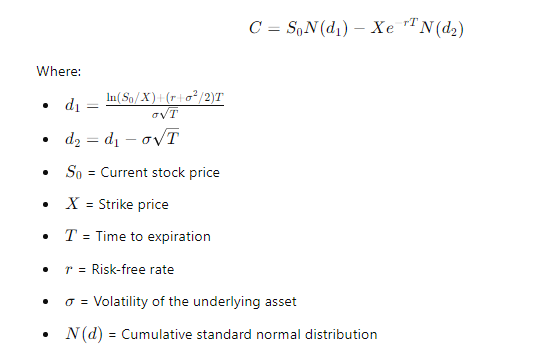

The formula uses risk-adjusted probabilities. N(d1) is the likelihood of obtaining the stock at option expiry, adjusted for risk, provided that the option expires in the money. N(d2) is the risk-adjusted probability that the option will be exercised. The probabilities are computed using normal cumulative distribution elements d1 and d2.

**2.3 Assumptions for the BSM:**

The Black-Sholes Model for option pricing is derived based on the following assumptions:

1. The underlying stock follows a Geometric Brownian Motion with constant volatility
2. The option the model works with, is European-Style option, that can only be exercised at expiration.
3. No dividens are paid during the life of the option
4. There are no transaction costs or taxes
5. The risk-free rate(r) is constant
6. Stock price movements are continuous, meaning stock return is continuously compounded.
7. There is no arbitrage opportunity, since the volatility of continuously compounded returns is known and constant.


**2.4 Python code for Black-Scholes Model:**

In [ ]:
# Black -Sholes Formula:
# S = Current Stock price
# X = Excersice/ Strike Price
# T = Time to Expiration
# r = Risk-Free rate
# sigma = volatility of price
# Option_ type = European Call option
# d1= risk-adjusted probability of obtaining the underlying stock at expiration,
# given option is in-the-money
# d2 = risk-adjusted probability that option will be  exercised

def black_scholes(S, X, T, r, sigma, option_type = "Call" ):
  # Calculate d1:(d1 takes into account the log normal return)
  d1 = (np.log(S/X) + (r + 0.5*sigma**2)*T)/(sigma*np.sqrt(T))

  #Calculate d2:
  d2= d1-sigma*np.sqrt(T)

  #Calculate call option price:
  call_price= (S*norm.cdf(d1,0,1) - X* np.exp(-r*T)*norm.cdf(d2,0,1))

  return call_price

In [ ]:
#Extract the values from the for Black -Sholes Formula:
S = calls.iloc[3]["lastPrice"] # Current Stock price
X = calls.iloc[3]["strike"]    # Excersice/ Strike Price
T = 3/12  #Time to Expiration is 3 months
r= (yf.Ticker("^IRX").history(period="1d").iloc[0]["Close"]/100).round(3)
#r= ((r_annual/12)*3).round(4)
  #Risk-Free rate rely on benchmark gorvenment securities. Hence 1-year Treasury yield is used for the rate, which is close
  # to the option expiration date.
  # The rate of Government 1 year bond ^IRX is extracted from yahoo finance with period of 1 day and only the recent rate is taken.
sigma = calls.iloc[3]["impliedVolatility"]#volatility of price


print("The current stock price is:", S)
print("The strike price is:", X)
print("The risk free-rate is:", r)
print("The volatility of stock price is:", sigma)

The current stock price is: 233.4
The strike price is: 20.0
The risk free-rate is: 0.045
The volatility of stock price is: 1.0000000000000003e-05


**2.5 Call-Option Price:**

In [ ]:
call_price=black_scholes(S, X, T, r, sigma, option_type = "Call" )
print(f"The price of European call option is: ${call_price:.3f}")

The price of European call option is: $213.624


**2.6 3D representation of the Black-Sholes Model:**

<ipython-input-3-d0a8c9e93259>:14: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S/X) + (r + 0.5*sigma**2)*T)/(sigma*np.sqrt(T))


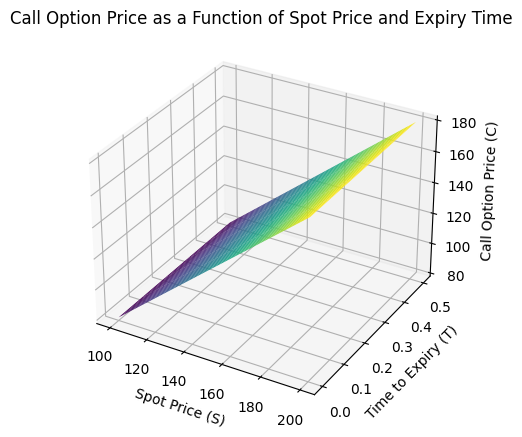

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Model a 3D plot of the Call Option Price as a function of Spot Price and Expiry time

# Generate spot prices in x-axis and expiry times in y-axis for the model representation
spot_prices = np.linspace(100, 200, 100)  # Spot prices  between 50 and 200
expiry_times = np.linspace(0, 0.5, 6 )  # Expiry times between 0 and 4 months

# Create a meshgrid for 3D plotting
S, T = np.meshgrid(spot_prices, expiry_times)

# Calculate call option prices for each combination of spot price and expiry time
call_price = black_scholes(S, X, T, r, sigma)

# Plotting
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
ax.plot_surface(S, T, call_price, cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('Spot Price (S)')
ax.set_ylabel('Time to Expiry (T)')
ax.set_zlabel('Call Option Price (C)')
ax.set_title('Call Option Price as a Function of Spot Price and Expiry Time');
plt.show();

**Figure-3D plot:**

The 3D plot generated using the Black-Scholes formula visually represents how the price of a European call option changes based on two key variables: the spot price of the underlying asset and the time to expiry (time until the option expires).

**X-Axis (Spot Price):**
1. The current stock price is represented in the X-axis labeled as Spot Price and ranges from USD 100  to  USD 200
2. The #-D plot displays that as the Spot price increase, the call option becomes more valueable and the underlying asset becomes in-the-money making it profitable for the buyer to exercise the option.

**Y-Axis(Expiry Times):**
1. The Y-axis represents the remaining time for the option to expire
2. Longer expiry times give the option holder more opportunity for the underlying asset to increase in value, which increases the value of the option.

**Z-Axis(Call price):**

1. The Z-axis represents the Call option price that is dependent on the current stock price and expiry times.
2. The higher value in Z- axis, the more expensive the option price.




##**3. BINOMIAL TREE MODEL:**

**3.1 Binomial Tree Model (BSM):**

Binomial Tree model is a simple and easy mathematical method for pricing options. With this model, investors can determine how likely they are to buy or sell at a given price in the future. It entails building a discrete-time model of an asset's changing price over time, which allows us to estimate the value of options. The model represents the evolution of the underlying asset price as a series of discrete steps, creating a tree of possible price path.

The price of the underlying asset increase or decrease by a certain factor each time step. This process is simulated many times until the option reaches its expiration date. The model calculates the price of the option at each step based on whether the contract is an American option, where the option can be exercised before the expiration date, or whether it an European option that allows exercise of the contract only at expiration. The model uses an iterative process for each period to determine how likely the movement will be up or down. The model effectively creates a binomial distribution of stock prices.

**3.2 Formula for the model:**

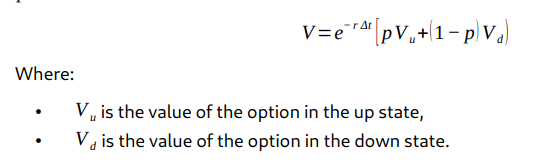



**Parameters and their formulae:**

*1. u: The up-factor, representing the proportion by which the price increases*

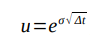

*2. d: The down-factor, representing the proportion by which the price decreases.*

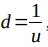

*3. p: The risk-neutral probability of the price moving up in the next step.*

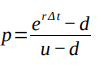

Where:

• Δt is the length of each time step,

• r is the risk-free rate,

• σ is the volatility.

**3.2 Assumptions of Binomial Tree Model:**

1. The risk-free rate does not change
2. There are no returns on the underlying stock
3. The price can only move wither up or down at any given point in time.
4. There are no transaction fees or taxes in today's market
5. The discount factor(interest rate) remains constant throughout the period.

**3.3 Python Code for Binomial Tree Model:**

In [ ]:
 # Calculating the Binomial Model
#S0 = Current Stock Price
#K = Strike price
#r = risk-free rate
# Sigma = Volatility
#T = Time to expiration
# N = Number of time steps
# Return = European call option

def binomial_tree_call(S0, K,r, Sigma, T, N):
     # Calculating the three parameters:
     delta_T= T/N

     # 1) u: The up-factor, representing the proportion by which the price increases:
     u = np.exp(Sigma * np.sqrt(delta_T))

     # 2) d: The down-factor, representing the proportion by which the price decreases:
     d = 1/u

     # 3) p: The risk-neutral probability of the price moving up in the next step:
     p= (np.exp(r *delta_T ) - d)/(u-d)

     # Initialize asset price at maturity( at the N-th Step)
     asset_price = np.zeros(N+1)
     option_price= np.zeros(N+1)

     #Asset price at maturity:
     for i in range (N+1):
       asset_price[i]= S0 * (u ** (N - i)) * (d ** i)

     #Option price at maturity:
     for i in range(N+1):
       option_price[i]= max(0, asset_price[i] - K)

     # Step backwards through the tree
     for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            option_price[i] = np.exp(-r*delta_T) *((p * option_price[i]) + ((1-p)* option_price[i+1]))
     return option_price[0]

In [ ]:
#Extract the values from the for Binomial Tree Formula:
S0 = calls.iloc[3]["lastPrice"] # Current Stock price
K = calls.iloc[3]["strike"]    # Excersice/ Strike Price
T = 3/12  #Time to Expiration is 3 months
r= (yf.Ticker("^IRX").history(period="1d").iloc[0]["Close"]/100).round(3)
#r= ((r_annual/12)*3).round(4)
  #Risk-Free rate rely on benchmark gorvenment securities. Hence 1-year Treasury yield is used for the rate, which is close
  # to the option expiration date.
  # The rate of Government 1 year bond ^IRX is extracted from yahoo finance with period of 1 day and only the recent rate is taken.
Sigma = calls.iloc[3]["impliedVolatility"] #volatility of price
N = 3 #Number of time steps

#print("The current stock price is:", S)
print("The strike price is:", K)
print("The risk free-rate is:", r)
print("The volatility of stock price is:", Sigma)

The strike price is: 20.0
The risk free-rate is: 0.045
The volatility of stock price is: 1.0000000000000003e-05


In [ ]:
# Call the binomial tree function to calculate the option price
option_price = binomial_tree_call(S0, K, r, Sigma, T, N)

print(f"The European call option price is: ${option_price:.5f}")

The European call option price is: $213.62375


**3.4 Python code for Visual Display of Binomial Tree Model:**

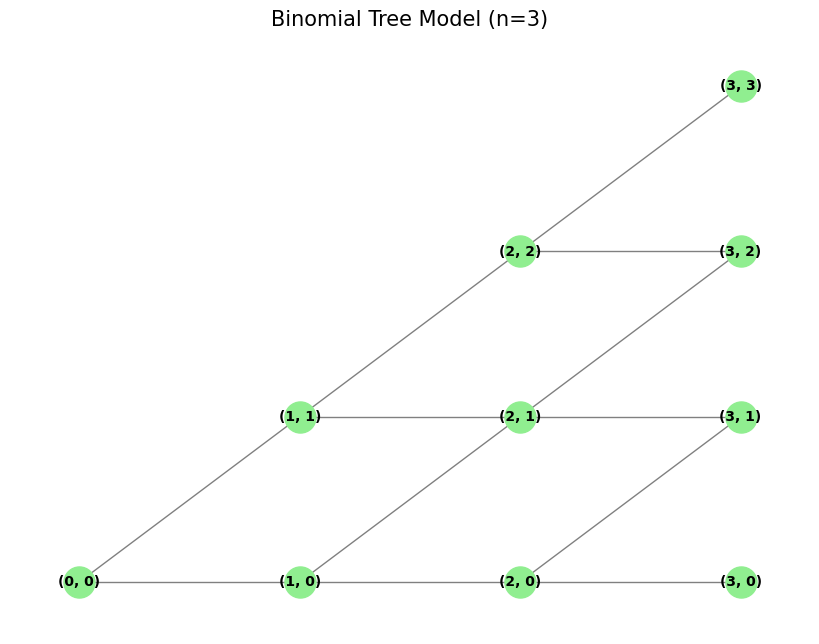

In [ ]:
import networkx as nx

#Function to generate a binomial tree:
def binomial_tree_graph(N):
  Graph =nx.Graph() #Create a Graph
  position = {} # Position dictionary for each node(for the layout)

  #Loop though each time step and each node of the time step:
  for i in range(N+1): #i is the time step from 0 to N and N=3
     for j in range (i+1): #j is the position in the tree upto i
         node=(i,j) #(time step, position)
         position[node]=( i,j-1/2) #offset nodes for visual

         # Add edges to the next time step (up and down moves)
         if i < N:
                Graph.add_edge((i, j), (i + 1, j))     # Down move
                Graph.add_edge((i, j), (i + 1, j + 1)) # Up move

  return Graph, position

# Number of steps in the binomial tree
N = 3 # Adjust this to increase/decrease the depth of the tree

# Create the binomial tree graph
Graph, pos = binomial_tree_graph(N)

# Plot the tree
plt.figure(figsize=(8, 6))
nx.draw(Graph, pos, with_labels=True, node_size=500, node_color="lightgreen", font_size=10, font_weight="bold", edge_color='gray')
plt.title(f'Binomial Tree Model (n={N})', size=15)
plt.show()

##**4. Comparison of Black-Sholes (BSM) and Binomial Models:**

Both the models are build on certain assumptions that are considered for its caculations:

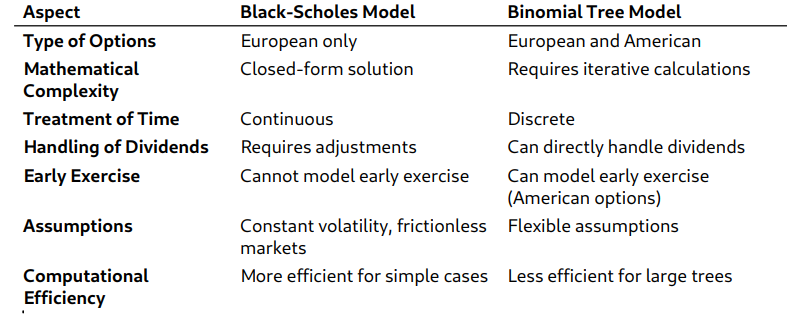



##**5. Analysis and Conclusion:**

In the above calculation of option pricing, Black-Sholes Model  and Binomial Tree Model have been used to estimate the future price of Tesla stock after 3 months, which is the expiration time of the contract. Both of the models provide European option pricing. Black-Sholes shows that the price of the underlying asset is estimated to be $213.624 while the Binomial Tree Model shows a predictive price of the underlying Tesla Stock price of USD 213.62375. Both the models show that the option is expected to be in-the money at the time of expiration, which indicates that the contract can be exercised by the option holder and will be benefitted,as the Stike price is at USD 20. The Binomial model represents an expected stock price almost similar to price predicted Black-Sholes model, with an insignificant difference. This simply indicates that the models, though have differences and consider different assumptions for the calculation, provide close outputs for the same inputs provided.

Thus, In real-world trading and risk management, the choice of model depends on the specific option being priced, the market conditions, and the assumptions that best fit the underlying asset's behavior. Traders often use a combination of models to ensure robust pricing and risk assessment.